# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2024)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 03.05.2024


### Erster Vorlesungsteil:  
#### Dominante Strategien und Nash-Gleichgewichte am Beispiel der folgenden Spiele: 
#### Gefangenendilemma, Hirschjagt- und Angsthasen-Spiel


## Einführung

In diesem Python Notebook werden die in der Vorlesung definierten Gleichgewichtskonzepte (dominante Strategie, reine und gemischte Nash-Gleichgewichte) am Beispiel dreier simultaner, symmetrischer (2 Spieler)-(2 Strategien) Spiele illustriert. 
Zunächst wird das Python-Modul "sympy" eingebunden, das ein Computer-Algebra-System für Python bereitstellt und symbolische Berechnungen und im speziellen Matrix-Berechnungen relativ einfach möglich macht.

In [1]:
from sympy import *
init_printing()

## Das Gefangenendilemma
Definition der Auszahlunsmatrix für Spieler A ( $\hat{\bf {\cal \$}}^A$ ):

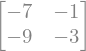

In [2]:
D_A=Matrix([[-7,-1],[-9,-3]])
D_A

Da es sich bei dem Spiel um ein symmetrisches (2 Personen)-(2 Strategien) Spiel handelt, erhält man die Auszahlungsmatrix für Spieler B durch die transponierte Matrix des Spielers A ( $\hat{\bf {\cal \$}}^B = (\hat{\bf {\cal \$}}^A)^T$ ): 

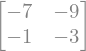

In [3]:
D_B=transpose(D_A)
D_B

Unter Verwendung der gemischten Strategien $(\tilde{s}^A,\tilde{s}^B) \equiv (x,y)$ lässt sich eine gemischte Auszahlungsfunktion der Spieler ( Spieler A: ${\bf \tilde{\cal \$}}^A(x,y)$ , Spieler B: ${\bf \tilde{\cal \$}}^B(x,y)$ ) wie folgt definieren:




In [4]:
def Dollar(x,y,DM):
    GemischteAuszahlung = DM[0,0]*x*y + DM[0,1]*x*(1-y) + DM[1,0]*(1-x)*y + DM[1,1]*(1-x)*(1-y)
    return GemischteAuszahlung

Die gemischte Auszahlungsfunktion des Spielers A ( ${\bf \tilde{\cal \$}}^A(x,y)$ ) besitzt im oben definierten Gefangenendilenmma das folgende Aussehen: 

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [6]:
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)

In [7]:
params = {
    'figure.figsize'    : [11,7],
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

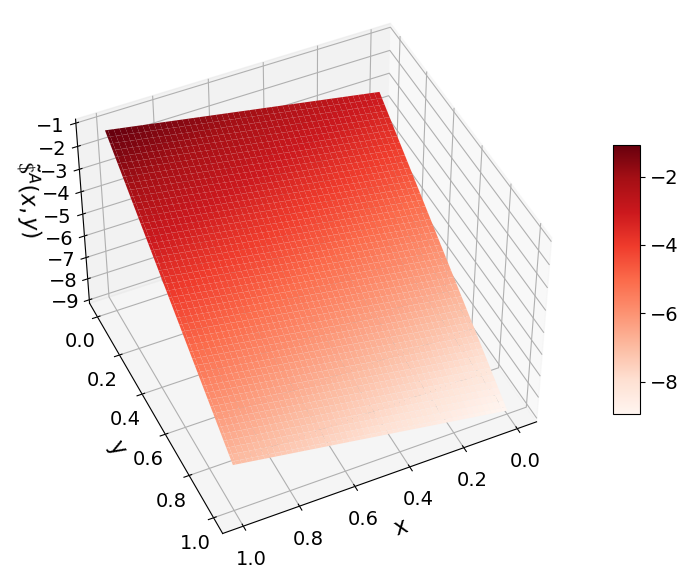

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Dollar(X, Y,D_A), cmap=cm.Reds, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

Die gemischte Auszahlungsfunktion des Spielers B ( ${\bf \tilde{\cal \$}}^B(x,y)$ ) besitzt im oben definierten Gefangenendilenmma das folgende Aussehen:

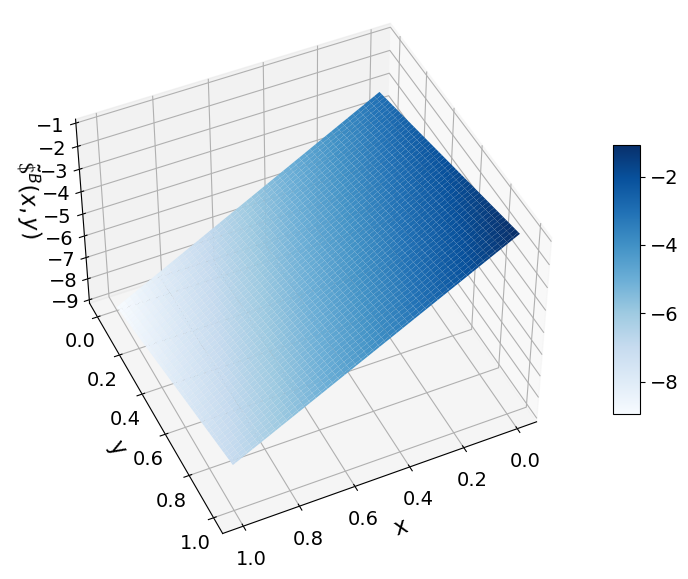

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Dollar(X, Y,D_B), cmap=cm.Blues, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^B(x,y)$");

Die Visualisierung kann man auch mittels der "Plotly Python Open Source Graphing Library" erstellen. In dieser Bibliothek ist es möglich interaktive Abbildungen in Python darzustellen ( siehe https://plotly.com/python/ ).

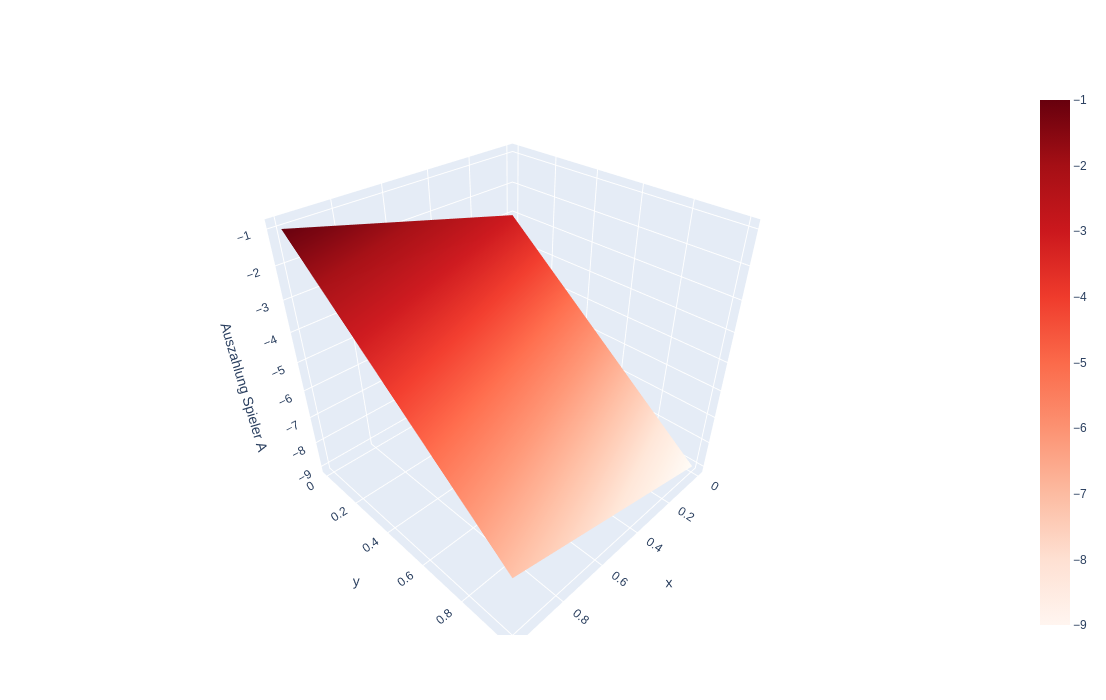

In [10]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(x=X, y=Y, z=np.array(Dollar(X, Y,D_A), dtype=np.float64), colorscale='Reds', showscale=True))

fig.update_layout(autosize=True,
                  width=700, height=700,
                  margin=dict(l=15, r=50, b=65, t=90))
fig.update_layout(scene = dict(
                    xaxis_title='x',
                    yaxis_title='y',
                    zaxis_title='Auszahlung Spieler A'))

Wir konzentrieren uns zunächst auf die gemischte Auszahlungsfunktion des Spielers A und werden anhand der Struktur der Auszahlungsfläche die Eigenschaften der dominanten Strategie im Gefangenendilemma verdeutlichen. Die Frage lautet: Unter der Annahme, dass Spieler B eine feste gemischte Strategie y spielt, welche Strategie x sollte Spieler A wählen, sodass er seine Auszahlung maximiert?

Nehmen wir an, dass Spieler B die reine Strategie y=0 spielen würde, dann wäre es das Beste für Spieler A, die reine Strategie x=1 zu spielen (siehe blaue Linie in der folgenden Abbildung).

Nehmen wir dagegen an, dass Spieler B die reine Strategie y=1 spielen würde, dann wäre es das Beste für Spieler A ebenfalls die reine Strategie x=1 zu spielen (siehe schwarze Linie in der folgenden Abbildung). Unabhängig von der Wahl der Strategie des Spielers B, ist Spieler A immer veranlasst die Strategie x=1 zu spielen (siehe z.B die grüne Linie bei y=0.5); (x,y)=(1,1) ist somit die dominante Strategie und das einzige Nash-Gleichgewicht im Gefangenendilemma.

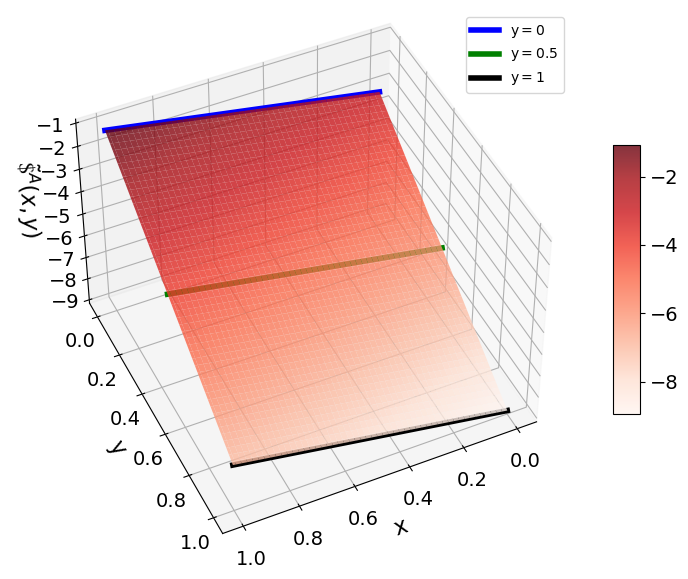

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Dollar(X, Y,D_A), cmap=cm.Reds, linewidth=0, alpha=0.8)
ax.plot3D(X[0,:], Y[0,:], Dollar(X, Y,D_A)[0,:], label=r"$\rm y=0$", color="blue", linewidth=4)
ax.plot3D(X[49,:], Y[49,:], Dollar(X, Y,D_A)[49,:], label=r"$\rm y=0.5$", color="green", linewidth=4)
ax.plot3D(X[99,:], Y[99,:], Dollar(X, Y,D_A)[99,:], label=r"$\rm y=1$", color="black", linewidth=4)
ax.view_init(azim=65, elev=45)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.legend()
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

## Das Hirschjagd-Spiel
Definition der Auszahlunsmatrix für Spieler A ( $\hat{\bf {\cal \$}}^A$ ):

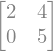

In [12]:
D_A=Matrix([[2,4],[0,5]])
D_A

Da es sich bei dem Spiel um ein symmetrisches (2 Personen)-(2 Strategien) Spiel handelt, erhält man die Auszahlungsmatrix für Spieler B durch die transponierte Matrix des Spielers A ( $\hat{\bf {\cal \$}}^B = (\hat{\bf {\cal \$}}^A)^T$ ): 

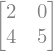

In [13]:
D_B=transpose(D_A)
D_B

Die gemischte Auszahlungsfunktion des Spielers A ( ${\bf \tilde{\cal \$}}^A(x,y)$ ) besitzt im oben definierten Hirschjagd-Spiel das folgende Aussehen: 

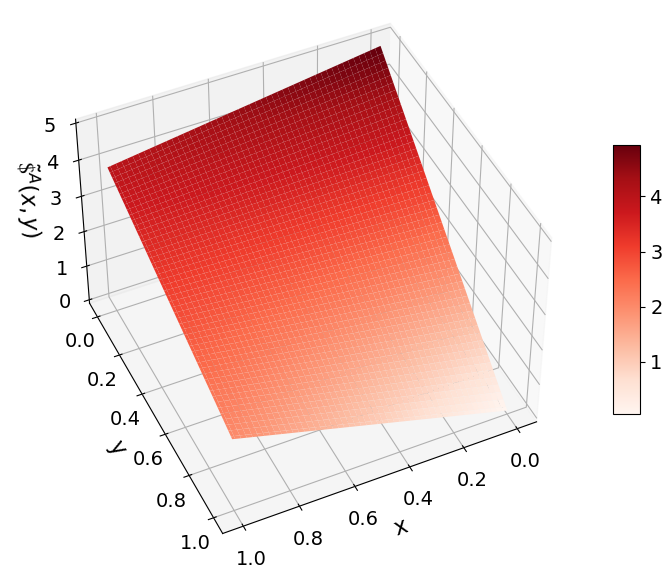

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Dollar(X, Y,D_A), cmap=cm.Reds, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
#ax.view_init(azim=0, elev=0)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

Wir konzentrieren uns zunächst auf die gemischte Auszahlungsfunktion des Spielers A und werden anhand der Struktur der Auszahlungsflächen die Eigenschaften der reinen und gemischten Nash-Gleichgewichte verdeutlichen. Die Frage lautet: Unter der Annahme, dass Spieler B eine feste gemischte Strategie y spielt, welche Strategie x sollte Spieler A wählen, dass er seine Auszahlung maximiert?  

Nehmen wir an, dass Spieler B die reine Strategie y=0 spielen würde, dann wäre es das Beste für Spieler A, auch die reine Strategie x=0 zu spielen. 

Nehmen wir dagegen an, dass Spieler B die reine Strategie y=1 spielen würde, dann wäre es das Beste für Spieler A ebenfalls die reine Strategie x=1 zu spielen. Da beim gemischten Nash-Gleichgewicht die Steigung in x-Richtung bei festem y=1/3 identisch verschwindet, verändert sich der Wert der Auszahlung für Spieler A bei Variation von x nicht. Diese Eigenschaft kann man visuell verdeutlichen, indem man sich die Auszahlungsfläche des Spielers A unter einem anderen Sichtwinkel betrachtet (siehe nachfolgende Animation).

In [15]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=65, elev=45)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$")
fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)

def init():
    ax.plot_surface(X, Y, Dollar(X, Y,D_A), cmap=cm.Reds, linewidth=0, alpha=1)
    return fig,

def animate(i):
    ax.view_init(azim=65-i*65/60, elev=45-i*45/60)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=60,interval=50)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Das Hirschjagd-Spiel besitzt somit ein gemischtes Nash-Gleichgewicht ($\tilde{s}^{A\star},\tilde{s}^{B\star}$) und zwei reine, symmetrische Nash-Gleichgewicht bei (x,y)=(0,0) und (x,y)=(1,1). Mittels der Bedingung für ein internes, gemischtes Nash-Gleichgewicht (partielle Ableitung der gemischten Auszahlungsfläche verschwindet)

$$
\left. \frac{ \partial {\bf \tilde{\cal \$}}^A(\tilde{s}^A,\tilde{s}^B)}{\partial \tilde{s}^A} \right|_{\tilde{s}^B=\tilde{s}^{B\star}}=3\, \tilde{s}^{B\star} -1 \stackrel{!}{=}0 \quad  \,\,\, \Rightarrow  \,\,\, \tilde{s}^{B\star}=\frac{1}{3}\approx0.33
$$

berechnet sich die spezielle Position der Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagd-Spiel zu $(\tilde{s}^{A\star} , \tilde{s}^{B\star})=(x^\star , y^\star)=(1/3 , 1/3)$.

Für Spieler A und B erhalten wir die folgenden Bedingungen:

In [16]:
x, y = symbols('x, y')
GlGemNashA=Eq(Dollar(x, y,D_A).diff(x), 0)
GlGemNashB=Eq(Dollar(x, y,D_B).diff(y), 0)
(GlGemNashB,GlGemNashA)

Löst man diese Bedingung nach y auf und die Bedingung für Spieler B nach x, so erhält man die Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagd-Spiel:  

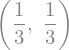

In [17]:
(solve(GlGemNashB,x)[0],solve(GlGemNashA,y)[0])

### Konzepte der Gleichgewichtsselektion
Besitzt ein Spiel mehr als einen Gleichgewichtszustand, so stellt sich die Frage, welcher dieser Gleichgewichte realisiert wird.

#### Pareto-Effizienz
Ein mögliches Kriterium bietet das Konzept der Pareto-Effizienz. Jeder Strategiewechsel der die Auszahlung eines Spielers
erhöht, ohne einen anderen Spieler zu verschlechtern, stellt eine Pareto-Verbesserung des Gleichgewichtszustand dar.
Strategienkombinationen von denen aus keine weite Verbesserung möglich ist, heissen Pareto-Effizient.

Ausgehend von der Strategiekombination des
Gleichgewichtszustandes (Hasen jagen,Hasen
jagen) ist ein Übergang zu (Hirsch jagen,Hirsch
jagen) für beide Spieler eine Verbesserung
(Pareto-Verbesserung). Die Strategie-
kombination des Gleichgewichtszustandes
(Hirsch jagen,Hirsch jagen) ist das eindeutige
Pareto-effiziente Nash-Gleichgewicht des Spiels
und wird als Pareto-perfektes Gleichgewicht
bezeichnet.

#### Risikodominanz
Bei manchen Spielen mit mehreren Gleichgewichtszuständen ist es jedoch fraglich, ob ein Pareto-perfektes Nash-
Gleichgewicht tatsächlich einem anderen vorzuziehen ist. Harsanyi und Selten hatten diesbezüglich im Jahre 1988 ein
weiteres Konzept der Gleichgewichtsselektion entwickelt, das sogenannte risikodominante Gleichgewicht. Wir verdeutlichen
dieses Konzept am Beispiel eines symmetrischen 2-Personen zwei Strategien Spiels.

Hierbei vergleicht man die mittlere Auszahlung
des Spielers bei Strategiewahl “Hasen jagen”
mit dem mittleren Auszahlungswert bei
 Risikodominantes
Strategienwahl “Hirsch jagen” . Das
 Nash-Gleichgewicht
Gleichgewicht mit dem höheren Wert ist das
risikodominante Gleichgewicht des Spiels. Unter
Verwendung der gemischten
Auszahlungsfunktion ergibt sich

\begin{eqnarray}
&{\bf \tilde{\cal \$}}^A(x,y) = 3xy − x − 5y + 5& \\
&{\bf \tilde{\cal \$}}^A(Hasen,0.5) = {\bf \tilde{\cal \$}}^A(1,0.5) = 1.5 − 1 − 2.5 + 5 = 3& \\
&{\bf \tilde{\cal \$}}^A(Hirsch,0.5) = {\bf \tilde{\cal \$}}^A(0,0.5) = −2.5 + 5 = 2.5& \\
&\Rightarrow {\bf \tilde{\cal \$}}^A(Hasen,0.5) = 3 > 2.5 = {\bf \tilde{\cal \$}}^A(Hirsch,0.5) &
\end{eqnarray}

, sodass die Strategiekombination des Gleichgewichtszustandes (Hasen jagen,Hasen jagen) das risikodominante Gleichgewicht des Spiels darstellt.

Die definierte Auszahlungsmatrix des Hirschjagd-Spiels ist nur eine spezielle Wahl (Verkaufspreis des Hirsches ist 10 und wird durch die zwei Spieler geteilt, Verkaufspreis der vier Hasen ist 4 ). Im Folgenden setzen wir den Verkaufspreis des Hirsches als variabel an (Parameter d) und berechnen das gemischte Nash-Gleichgewicht in Abhängigkeit von diesem Parameter. Für d=10 erhalten wir $(\tilde{s}^{A\star},\tilde{s}^{B\star})=(x,y)=(1/3 , 1/3)$ und für d=20 $(\tilde{s}^{A\star} , \tilde{s}^{B\star})=(x^\star , y^\star)=(3/4 , 3/4)$.

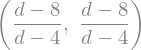

In [18]:
d = symbols('d')
D_A=Matrix([[2,4],[0,d/2]])
D_B=transpose(D_A)
GlGemNashA=Eq(Dollar(x, y,D_A).diff(x), 0)
GlGemNashB=Eq(Dollar(x, y,D_B).diff(y), 0)
(solve(GlGemNashB,x)[0],solve(GlGemNashA,y)[0])

Die folgende Animation zeigt die gemischte Auszahlungsfunktion des Spielers A im Hirschjagd-Spiel bei Variation des Parameters d im Bereich 10 bis 20. 

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)
ax.view_init(azim=0, elev=0)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$")

def animate(i):
    ax.cla()
    ax.set_zlim(0,10)
    surf=ax.plot_surface(X, Y, Dollar(X, Y,D_A.subs(d,10+i)), cmap=cm.Reds, linewidth=0, alpha=1)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=10,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

## Das Angsthasen-Spiel (Chicken Game) 
Definition der Auszahlunsmatrix für Spieler A ( $\hat{\bf {\cal \$}}^A$ ):

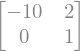

In [20]:
D_A=Matrix([[-10,2],[0,1]])
D_A

Da es sich bei dem Spiel um ein symmetrisches (2 Personen)-(2 Strategien) Spiel handelt, erhält man die Auszahlungsmatrix für Spieler B durch die transponierte Matrix des Spielers A ( $\hat{\bf {\cal \$}}^B = (\hat{\bf {\cal \$}}^A)^T$ ): 

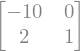

In [21]:
D_B=transpose(D_A)
D_B

Die gemischte Auszahlungsfunktion des Spielers A ( ${\bf \tilde{\cal \$}}^A(x,y)$ ) besitzt im oben definierten Angsthasen-Spiel das folgende Aussehen: 

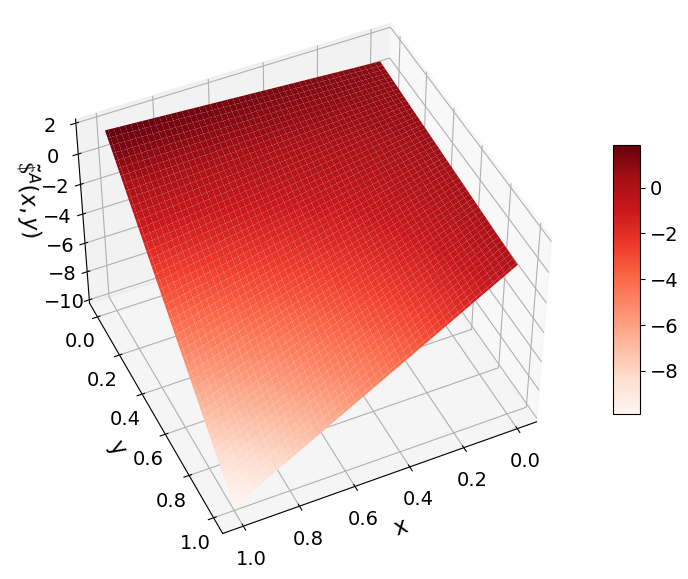

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Dollar(X, Y,D_A), cmap=cm.Reds, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
#ax.view_init(azim=0, elev=0)
fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

Wir konzentrieren uns zunächst auf die gemischte Auszahlungsfunktion des Spielers A und werden anhand der Struktur der Auszahlungsflächen die Eigenschaften der reinen und gemischten Nash-Gleichgewichte verdeutlichen. Die Frage lautet: Unter der Annahme, dass Spieler B eine feste gemischte Strategie y spielt, welche Strategie x sollte Spieler A wählen, dass er seine Auszahlung maximiert?  

Nehmen wir an, dass Spieler B die reine Strategie y=0 spielen würde, dann wäre es das Beste für Spieler A, die reine Strategie x=1 zu spielen. 

Nehmen wir dagegen an, dass Spieler B die reine Strategie y=1 spielen würde, dann wäre es das Beste für Spieler A die reine Strategie x=0 zu spielen. Da beim gemischten Nash-Gleichgewicht die Steigung in x-Richtung bei festem $y=\frac{1}{11}$ identisch verschwindet, verändert sich der Wert der Auszahlung für Spieler A bei Variation von x nicht. Diese Eigenschaft kann man visuell verdeutlichen, indem man sich die Auszahlungsfläche des Spielers A unter einem anderen Sichtwinkel betrachtet (siehe nachfolgende Animation).

In [23]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$")

def init():
    ax.plot_surface(X, Y, Dollar(X, Y,D_A), cmap=cm.Reds, linewidth=0, alpha=1)
    ax.view_init(azim=65, elev=45)
    return fig,

def animate(i):
    ax.view_init(azim=65-i*65/60, elev=45-i*45/60)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=60,interval=50)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Das Angsthasen-Spiel besitzt somit ein gemischtes Nash-Gleichgewicht ($\tilde{s}^{A\star},\tilde{s}^{B\star}$) und zwei reine, unsymmetrische Nash-Gleichgewicht bei (x,y)=(1,0) und (x,y)=(0,1). Mittels der Bedingung für ein internes, gemischtes Nash-Gleichgewicht (partielle Ableitung der gemischten Auszahlungsfläche verschwindet)

$$
\left. \frac{ \partial {\bf \tilde{\cal \$}}^A(\tilde{s}^A,\tilde{s}^B)}{\partial \tilde{s}^A} \right|_{\tilde{s}^B=\tilde{s}^{B\star}}=-10\, \tilde{s}^{B\star} +1 \stackrel{!}{=}0 \quad  \,\,\, \Rightarrow  \,\,\, \tilde{s}^{B\star}=\frac{1}{11}\approx0.091
$$

berechnet sich die spezielle Position der Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagt-Spiel zu $(\tilde{s}^{A\star} , \tilde{s}^{B\star})=(x^\star , y^\star)=(\frac{1}{11} , \frac{1}{11})$.

Für Spieler A und B erhalten wir die folgenden Bedingungen:

In [24]:
x,y = symbols('x, y')
GlGemNashA=Eq(Dollar(x, y,D_A).diff(x), 0)
GlGemNashB=Eq(Dollar(x, y,D_B).diff(y), 0)
(GlGemNashB,GlGemNashA)

Löst man diese Bedingung nach y auf und die Bedingung für Spieler B nach x, so erhält man die Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagt-Spiel:

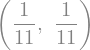

In [25]:
(solve(GlGemNashB,x)[0],solve(GlGemNashA,y)[0])